In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
# Load files 2018,2019,2020 and 2021
da18 = pd.read_excel('2018.xlsx')
da19 = pd.read_excel('2019.xlsx')
da20 = pd.read_excel('2020.xlsx')
da21 = pd.read_excel('2021.xlsx')

In [3]:
# Format date type
da18['End Date'] = pd.to_datetime(da18['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da19['End Date'] = pd.to_datetime(da19['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da20['End Date'] = pd.to_datetime(da20['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da21['End Date'] = pd.to_datetime(da21['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)

In [4]:
# Rename conductor feedback
da18.rename(columns = {'Are there any other comments you would like to make about the value of the Choir to you?':'conductorfeedback'},inplace = True)
da19.rename(columns = {'3.Is there anything that you particularly like about the choir?':'conductorfeedback'},inplace = True)
da20.rename(columns = {'Do you have any feedback for us about our live sessions?':'conductorfeedback'},inplace = True)
da21.rename(columns = {'9. What is the best thing about the choir? ___________':'conductorfeedback'},inplace = True)

In [5]:
da20_clean = da20['conductorfeedback'].dropna()

In [6]:
da20_clean = da20_clean.reset_index()
da20_clean = da20_clean.drop(columns=['index'])

In [7]:
# 4.Topic modelling
from nltk.stem import PorterStemmer
import re

In [8]:
#Data Cleaning by removing punctuations, numbers, special characters, and short words
documents = da20_clean['conductorfeedback']
Cleaned_doc = []
for r in range(len(documents)):
    tweet = documents[r]
    try:
        tweet = re.sub('[^A-Za-z]', ' ', tweet) #removing everything except alphabets
        tweet = tweet.lower() #lowercase
        Tokens = tweet.split() #tokenization
        Filtered_token = [w for w in Tokens if len(w)>3] # removing short words
        tweet = ' '.join(Filtered_token) 
    except:
        continue
#Save cleaned text
    Cleaned_doc.append(tweet) 
    print('-[Tweet Text]: ', tweet)

-[Tweet Text]:  good know same singing together frustrating
-[Tweet Text]:  like singing popular songs that either funny uplifting jove singing rounds love when conductors silly love seeing their pets
-[Tweet Text]:  great alternative normal choir gives something look forward
-[Tweet Text]:  love robert sessions needs somehow better lighting them improve picture screen
-[Tweet Text]:  haven connected live stream daniel session thought great
-[Tweet Text]:  will wait until each person again with many zoom meetings over time home choir feel just there despite wonderful leader lovely people after real gathering leave with after live stream experince left flat unfortunately hard sign along cant hear else sing nice idea keep people connected
-[Tweet Text]:  very good
-[Tweet Text]:  love been able communicate with other people with similar interests especially while isolation
-[Tweet Text]:  format does give many access creative arts music being great mental health everyone live events much

In [9]:
#Remove the stop-words from the text data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = ['https','because','please','very','thank','call','watch','look','today','something','someone',
 'anyone','anything','everyone','everything','thanks','care','thing','doesn','things']
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
            each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_doc[r])

-[Cleaned Text]:  good know same singing together frustrating
-[Cleaned Text]:  like singing popular songs that either funny uplifting jove singing rounds love when conductors silly love seeing their pets
-[Cleaned Text]:  great alternative normal choir gives forward
-[Cleaned Text]:  love robert sessions needs somehow better lighting them improve picture screen
-[Cleaned Text]:  haven connected live stream daniel session thought great
-[Cleaned Text]:  will wait until each person again with many zoom meetings over time home choir feel just there despite wonderful leader lovely people after real gathering leave with after live stream experince left flat unfortunately hard sign along cant hear else sing nice idea keep people connected
-[Cleaned Text]:  good
-[Cleaned Text]:  love been able communicate with other people with similar interests especially while isolation
-[Cleaned Text]:  format does give many access creative arts music being great mental health live events much would like

In [10]:
#Select only nouns
Cleaned_doc_noun = Cleaned_doc
for r in range(len(Cleaned_doc_noun)):
    lines = Cleaned_doc[r]
# function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
 # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    Cleaned_doc_noun[r] = ' '.join(nouns) 
    print('-[Cleaned Text Noun]: ', Cleaned_doc_noun[r])

-[Cleaned Text Noun]:  know
-[Cleaned Text Noun]:  songs uplifting jove rounds conductors pets
-[Cleaned Text Noun]:  choir
-[Cleaned Text Noun]:  love robert sessions picture screen
-[Cleaned Text Noun]:  stream daniel session
-[Cleaned Text Noun]:  person zoom meetings time home choir feel leader people gathering stream experince sign hear idea people
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  communicate people interests isolation
-[Cleaned Text Noun]:  format access arts music health events
-[Cleaned Text Noun]:  choir couch choir videos compilation
-[Cleaned Text Noun]:  access manage times
-[Cleaned Text Noun]:  majority song selections
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  sessions sessions consuctor conductors conductors people weeks people sessions nights week toubda time slots food prep dinner time family times timing
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  love sessions sings relationship choice songs conductor suzanne
-[Cleaned Text Noun]:  event page fo

In [11]:
# 4.2 Term document matrix

In [12]:
#Fit and transform the processed titles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer() 
count_data = count_vectorizer.fit_transform(Cleaned_doc_noun)
count_data

<72x222 sparse matrix of type '<class 'numpy.int64'>'
	with 376 stored elements in Compressed Sparse Row format>

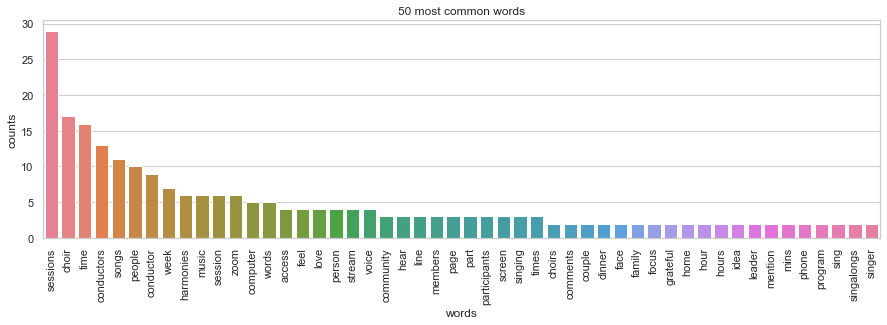

In [13]:
#Visualise most common words
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

terms = count_vectorizer.get_feature_names()
# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
 
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
 
plt.figure(2, figsize=(15, 4))
plt.subplot(title='50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [14]:
# 4.3/ Term selection

In [15]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 30 and total_counts[t] > 1:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  54


<72x54 sparse matrix of type '<class 'numpy.int64'>'
	with 208 stored elements in Compressed Sparse Row format>

In [16]:
#4.4. Topic number

In [17]:
#Install Gensim package
!pip install Cython
!pip install gensim

In [18]:
#Data Preparation
Cleaned_doc_noun_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc_noun)):
    each_item = []
    for t in Cleaned_doc_noun[r].split():
 #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
            each_item.append(t)
    Cleaned_doc_noun_new.append(each_item) 
    print(Cleaned_doc_noun_new[r])

CLEANED TEXT NEW: 
[]
['songs', 'conductors']
['choir']
['love', 'sessions', 'screen']
['stream', 'session']
['person', 'zoom', 'time', 'home', 'choir', 'feel', 'leader', 'people', 'stream', 'hear', 'idea', 'people']
[]
['people']
['access', 'music']
['choir', 'choir']
['access', 'times']
['song']
[]
['sessions', 'sessions', 'conductors', 'conductors', 'people', 'people', 'sessions', 'week', 'time', 'dinner', 'time', 'family', 'times']
[]
['love', 'sessions', 'songs', 'conductor']
['page', 'songs', 'page', 'songs', 'page', 'access']
[]
['program']
['conductors', 'couple', 'sessions', 'conductors', 'sessions', 'conductor']
[]
['sessions', 'zoom', 'technology', 'choir']
['hear', 'harmonies', 'choir', 'sessions', 'harmonies', 'program']
['session', 'choir', 'conductor', 'singer']
['love', 'harmonies']
['phone', 'computer', 'words', 'computer', 'computer', 'phone', 'time', 'sessions', 'words', 'words', 'conductor', 'words', 'sessions']
[]
['think', 'conductors', 'time', 'feel', 'sessions']

In [19]:
import gensim.corpora as corpora
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_noun_new)
print(id2word.token2id)

{'conductors': 0, 'songs': 1, 'choir': 2, 'love': 3, 'screen': 4, 'sessions': 5, 'session': 6, 'stream': 7, 'feel': 8, 'hear': 9, 'home': 10, 'idea': 11, 'leader': 12, 'people': 13, 'person': 14, 'time': 15, 'zoom': 16, 'access': 17, 'music': 18, 'times': 19, 'song': 20, 'dinner': 21, 'family': 22, 'week': 23, 'conductor': 24, 'page': 25, 'program': 26, 'couple': 27, 'technology': 28, 'harmonies': 29, 'singer': 30, 'computer': 31, 'phone': 32, 'words': 33, 'think': 34, 'grateful': 35, 'members': 36, 'part': 37, 'variety': 38, 'choirs': 39, 'line': 40, 'sing': 41, 'comments': 42, 'singalongs': 43, 'voice': 44, 'mins': 45, 'hour': 46, 'singing': 47, 'community': 48, 'face': 49, 'hours': 50, 'focus': 51, 'mention': 52, 'participants': 53}


In [20]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_noun_new]
print(Corpus)

[[], [(0, 1), (1, 1)], [(2, 1)], [(3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1)], [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1)], [], [(13, 1)], [(17, 1), (18, 1)], [(2, 2)], [(17, 1), (19, 1)], [(20, 1)], [], [(0, 2), (5, 3), (13, 2), (15, 2), (19, 1), (21, 1), (22, 1), (23, 1)], [], [(1, 1), (3, 1), (5, 1), (24, 1)], [(1, 2), (17, 1), (25, 3)], [], [(26, 1)], [(0, 2), (5, 2), (24, 1), (27, 1)], [], [(2, 1), (5, 1), (16, 1), (28, 1)], [(2, 1), (5, 1), (9, 1), (26, 1), (29, 2)], [(2, 1), (6, 1), (24, 1), (30, 1)], [(3, 1), (29, 1)], [(5, 2), (15, 1), (24, 1), (31, 3), (32, 2), (33, 4)], [], [(0, 1), (5, 1), (8, 1), (15, 1), (34, 1)], [(5, 2), (17, 1)], [(16, 1), (35, 1), (36, 1)], [(37, 1)], [(0, 1), (38, 1)], [(5, 1), (7, 1), (39, 1), (40, 1), (41, 1)], [], [(2, 1), (5, 1), (16, 1), (36, 1)], [(5, 1), (33, 1), (42, 2)], [(1, 1), (13, 2), (43, 1), (44, 1)], [(15, 1), (23, 1), (34, 1)], [(23, 1)], [(5, 1), (41, 1)], [(2, 1), (9, 1)], [(5, 1)],

In [21]:
#Gensim LDA Model
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint
#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=15,
random_state=100)
#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.197*"sessions" + 0.132*"choir" + 0.068*"couple" + 0.068*"mins" + '
  '0.068*"conductor" + 0.068*"grateful" + 0.068*"songs" + 0.068*"love" + '
  '0.068*"people" + 0.004*"time"'),
 (1,
  '0.117*"people" + 0.117*"music" + 0.117*"community" + 0.061*"times" + '
  '0.061*"variety" + 0.061*"conductor" + 0.061*"harmonies" + 0.061*"voice" + '
  '0.061*"person" + 0.061*"part"'),
 (2,
  '0.181*"sessions" + 0.114*"conductors" + 0.091*"words" + 0.091*"conductor" + '
  '0.069*"computer" + 0.069*"time" + 0.046*"phone" + 0.046*"feel" + '
  '0.046*"songs" + 0.024*"hour"'),
 (3,
  '0.100*"time" + 0.100*"sessions" + 0.086*"conductors" + 0.058*"session" + '
  '0.058*"people" + 0.058*"zoom" + 0.058*"choir" + 0.043*"stream" + '
  '0.029*"singing" + 0.029*"harmonies"'),
 (4,
  '0.373*"time" + 0.152*"week" + 0.078*"think" + 0.078*"sessions" + '
  '0.078*"songs" + 0.005*"choir" + 0.005*"conductors" + 0.005*"conductor" + '
  '0.005*"people" + 0.005*"love"'),
 (5,
  '0.188*"choir" + 0.096*"hours" + 0.0

In [22]:
#Compute topic coherence sore
from gensim.models import CoherenceModel
# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5085250528785571


In [23]:
#Experiment with Topic Numbers
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,16,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=top,
random_state=100)
 #Keep the trained models
 Trained_Models.append(lda_model)
 #Compute coherence score for each model
 coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
 coherence = coherence_model_lda.get_coherence()
 #Save and print the coherence scores 
 coherence_scores.append(coherence)
 print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.44803767111590276
Topic Number: 3 -- Coherence: 0.4584403817952502
Topic Number: 4 -- Coherence: 0.43972235321550357
Topic Number: 5 -- Coherence: 0.4896394694786429
Topic Number: 6 -- Coherence: 0.47234225331983737
Topic Number: 7 -- Coherence: 0.47687785332611554
Topic Number: 8 -- Coherence: 0.48367361050232455
Topic Number: 9 -- Coherence: 0.4764804838766621
Topic Number: 10 -- Coherence: 0.47339286157203475
Topic Number: 11 -- Coherence: 0.4696738495984466
Topic Number: 12 -- Coherence: 0.4776496138479052
Topic Number: 13 -- Coherence: 0.5007274186420647
Topic Number: 14 -- Coherence: 0.5083354129890578
Topic Number: 15 -- Coherence: 0.5085250528785571


Text(0, 0.5, 'Coherence')

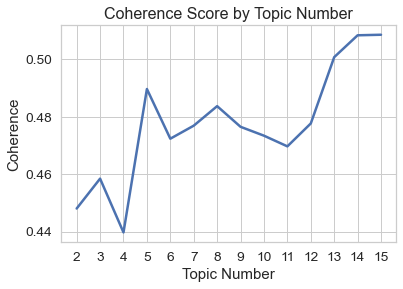

In [24]:
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

In [25]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]
#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(4,
  '0.373*"time" + 0.152*"week" + 0.078*"think" + 0.078*"sessions" + 0.078*"songs" + 0.005*"choir" + 0.005*"conductors" + 0.005*"conductor" + 0.005*"people" + 0.005*"love"'),
 (12,
  '0.105*"people" + 0.105*"sessions" + 0.105*"choir" + 0.105*"love" + 0.054*"singalongs" + 0.054*"songs" + 0.054*"zoom" + 0.054*"screen" + 0.054*"voice" + 0.054*"members"'),
 (7,
  '0.264*"choir" + 0.092*"conductor" + 0.092*"voice" + 0.092*"session" + 0.092*"singer" + 0.092*"part" + 0.006*"sessions" + 0.006*"week" + 0.006*"songs" + 0.006*"time"'),
 (8,
  '0.085*"computer" + 0.085*"music" + 0.085*"singer" + 0.085*"voice" + 0.085*"mention" + 0.085*"screen" + 0.085*"feel" + 0.085*"conductor" + 0.085*"songs" + 0.005*"sessions"'),
 (10,
  '0.111*"songs" + 0.111*"week" + 0.057*"session" + 0.057*"people" + 0.057*"time" + 0.057*"zoom" + 0.057*"part" + 0.057*"singalongs" + 0.057*"conductors" + 0.057*"members"'),
 (9,
  '0.162*"mention" + 0.162*"conductors" + 0.162*"focus" + 0.010*"sessions" + 0.010*"choir" + 0.01

In [26]:
#4.5/ LDA Model
#Train LDA Model with 15 topics
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Tweak the two parameters below
number_topics = 15
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[ 1.06666642,  7.06666797,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  2.06666685,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  0.06666688,  0.06666667,  0.06666667,  0.06666667,
         0.06666676,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  0.06666667,  0.06666667,  2.06666646,  0.06666667,
         0.06666667,  0.06666667,  1.06666647,  0.06666667,  0.06666667,
         0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  0.06666675,  0.06666667,  0.06666667,  0.06666667,
         0.06666681,  0.06666667,  0.06666667,  1.06666623,  0.06666667,
         0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
         0.06666675,  0.06666667,  0.06666667,  0.06666667],
       [ 0.06666667,  2.06666669,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
         0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.

In [27]:
#Word Probablities by Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[0.06060604 0.4015152  0.00378788 0.00378788 0.00378788 0.00378788
  0.11742425 0.00378788 0.00378788 0.00378788 0.00378788 0.00378789
  0.00378788 0.00378788 0.00378788 0.00378788 0.00378788 0.00378788
  0.00378788 0.00378788 0.00378788 0.00378788 0.00378788 0.11742422
  0.00378788 0.00378788 0.00378788 0.06060605 0.00378788 0.00378788
  0.00378788 0.00378788 0.00378788 0.00378788 0.00378788 0.00378788
  0.00378788 0.00378788 0.00378788 0.00378788 0.00378789 0.00378788
  0.00378788 0.06060603 0.00378788 0.00378788 0.00378788 0.00378788
  0.00378788 0.00378788 0.00378788 0.00378788 0.00378788 0.00378788]
 [0.00467589 0.14495266 0.00467589 0.00467589 0.00467589 0.00467589
  0.00467589 0.00467589 0.00467589 0.00467589 0.00467589 0.00467589
  0.00467589 0.00467589 0.00467599 0.00467589 0.00467589 0.00467589
  0.07481428 0.00467589 0.00467589 0.00467589 0.00467589 0.00467589
  0.21509104 0.00467589 0.00467589 0.00467589 0.00467589 0.00467589
  0.00467589 0.00467589 0.00467589 0.00467589 0

In [28]:
#Extract and view the top words in each topic
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
choir : 0.402
conductor : 0.117
love : 0.117
music : 0.061
access : 0.061

Topic #1:
members : 0.215
choir : 0.145
sessions : 0.145
zoom : 0.121
hour : 0.075

Topic #2:
week : 0.522
technology : 0.092
conductors : 0.092
think : 0.006
choir : 0.006

Topic #3:
people : 0.232
grateful : 0.014
sessions : 0.014
sing : 0.014
choir : 0.014

Topic #4:
singing : 0.164
conductors : 0.164
music : 0.085
line : 0.085
variety : 0.085

Topic #5:
songs : 0.142
people : 0.142
part : 0.096
singalongs : 0.096
sing : 0.049

Topic #6:
time : 0.207
words : 0.139
sessions : 0.123
computer : 0.084
page : 0.084

Topic #7:
songs : 0.225
conductors : 0.225
conductor : 0.152
focus : 0.078
mention : 0.078

Topic #8:
song : 0.232
grateful : 0.014
sessions : 0.014
sing : 0.014
choir : 0.014

Topic #9:
session : 0.149
participants : 0.149
voice : 0.149
singer : 0.100
music : 0.052

Topic #10:
sessions : 0.311
conductors : 0.147
time : 0.095
couple : 0.043
feel : 0.043

Topic #11:
choir : 0.142
harmonies : 

In [29]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,access,choir,choirs,comments,community,computer,conductor,conductors,couple,dinner,...,stream,technology,think,time,times,variety,voice,week,words,zoom
0,0.060606,0.401515,0.003788,0.003788,0.003788,0.003788,0.117424,0.003788,0.003788,0.003788,...,0.003788,0.003788,0.003788,0.003788,0.003788,0.003788,0.003788,0.003788,0.003788,0.003788
1,0.004676,0.144953,0.004676,0.004676,0.004676,0.004676,0.004676,0.004676,0.004676,0.004676,...,0.004676,0.004676,0.004676,0.004676,0.004676,0.004676,0.004676,0.004676,0.004676,0.120932
2,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.092184,0.005762,0.005762,...,0.005762,0.092184,0.005762,0.005762,0.005762,0.005762,0.005762,0.521795,0.005762,0.005762
3,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,...,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493
4,0.005291,0.005291,0.005291,0.005291,0.005291,0.005291,0.005291,0.164021,0.005291,0.005291,...,0.005291,0.005291,0.005291,0.005291,0.005291,0.084656,0.005291,0.005291,0.005291,0.005291
5,0.003086,0.003086,0.049383,0.003086,0.003086,0.003086,0.049383,0.003086,0.003086,0.003086,...,0.049383,0.003086,0.003086,0.049383,0.003086,0.003086,0.003086,0.003086,0.003086,0.003086
6,0.029206,0.001825,0.001825,0.001825,0.001825,0.083967,0.029206,0.001825,0.001825,0.001825,...,0.001825,0.001825,0.056587,0.206673,0.001825,0.001825,0.001825,0.001825,0.138729,0.001825
7,0.004902,0.004902,0.004902,0.004902,0.004902,0.004902,0.151961,0.225490,0.004902,0.004902,...,0.004902,0.004902,0.004902,0.004902,0.004902,0.004902,0.004902,0.004902,0.004902,0.004902
8,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,...,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493,0.014493
9,0.003236,0.003236,0.003236,0.003236,0.003236,0.051780,0.003236,0.003236,0.003236,0.003236,...,0.003236,0.003236,0.003236,0.003236,0.003236,0.003236,0.148867,0.003236,0.003236,0.003236


In [30]:
!pip install wordcloud

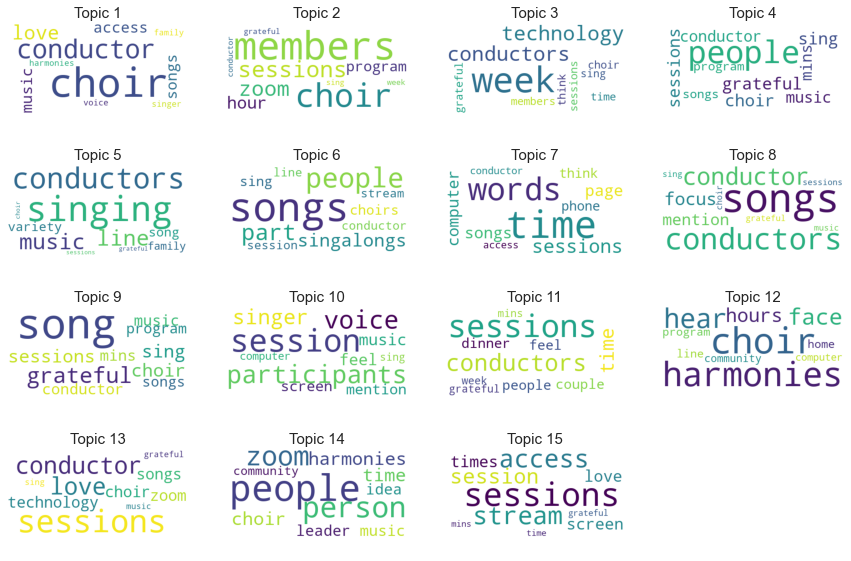

In [31]:
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
 count_dict = (zip(ReducedTerm, topic))
 count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
 # convert to dictionary type - keep top 10 words
 Word_Frequency = dict(count_dict[0:10])
 # generate word cloud
 wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
 # visualize word cloud in figure
 subfig_Row = math.floor(topic_idx/4)
 subfig_Col = math.ceil(topic_idx%4)
 ax[subfig_Row,subfig_Col].imshow(wordcloud)
 ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1)) 
plt.show() 